# Difference Finite Scheme derived from Lattice Boltzmann

Due to the similarities in the grid structure between the Lattice Boltzmann method and finite difference schemes, several studies have been conducted over the years to investigate how these methods can be directly related and interpreted {cite:p}`ancona1994fully,junk2001finite,suga2010accurate,dubois2017lattice,chen2023fourth`. In this section, we develop a finite-difference interpretation for different Lattice Boltzmann formulations.

## Interpretation for Diffusive Equation

In the remainder of this section, we develop a FDM interpretation of the diffusive LBM, following the approach proposed by {cite:t}`suga2010accurate`.

Given the LBM formulation for the diffusive equation:

$$
f_i( x_{\alpha} + e_{i,\alpha} \delta t, t+\delta t) = f_i(x_{\alpha}, t)  -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right) \qquad \rightarrow \qquad f_i( x_{\alpha} + e_{i,\alpha} \delta t, t+\delta t) = f_i(x_{\alpha}, t)  - \omega\left( f_{i} - f_{i}^{eq} \right), 
$$(LB-df-Eq)

where the equilibrium distribution function is defined by

$$
f^{eq}_{i} = w_{i}\phi(x_{\alpha}, t),
$$(df-feq-Eq)

and the equilibrium moments are given by 

$$
\displaystyle\sum_{i=0} f_{i}^{eq}=\phi, \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} e_{i,\alpha} =0 \quad \quad \textrm{and} \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} e_{i,\alpha} e_{i,\beta} =c_{s}^{2} \phi \delta_{\alpha\beta}.
$$(moments-fi-df)

Through Chapman–Enskog analysis, it is demonstrated that the first-order non-equilibrium moment describes the pressure gradient and, consequently, the average velocity:

$$
m^{neq}_{\alpha} = \displaystyle\sum_{i} e_{i,\alpha}\left( f_i-f_i^{eq}\right)  = -(c_{s}^{2} \tau \delta_{t})\partial_{\alpha}\phi  \quad \quad \textrm{and} \quad\quad \tau = \displaystyle\frac{\nu}{c_{s}^{2} \delta_{t}} +\frac{1}{2}.
$$

### FDM Interpretation

For simplification we redefine the notation for $f_i( x_{\alpha} + e_{i,\alpha} \delta t, t+\delta t)=f_{i,x+c_{i}}^{t+1}$. Reinterpreting the Eq. {eq}`LB-df-Eq` in pre-streaming moment:

$$
f_{i,x}^{t+1}  = f_{i,x-c_{i}}^{t}  - \omega \left( f_{i,x-c_{i}}^{t} - f_{i,x-c_{i}}^{eq,t} \right).
$$(pre-LB-df-Eq)

Summing the Eq. {eq}`pre-LB-df-Eq` over all lattice direction and replacing $f_{i}^{eq}$ by Eq. {eq}`df-feq-Eq`, we have:

$$
\displaystyle\sum_{i}\Big( f_{i,x}^{t+1} \Big) = \displaystyle\sum_{i}\Big( f_{i,x-c_{i}}^{t}  - \omega \left( f_{i,x-c_{i}}^{t} - f_{i,x-c_{i}}^{eq,t} \right) \Big) \qquad \rightarrow  \qquad \phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega) f_{i,x-c_{i}}^{t}  + \omega w_{i}\phi_{x-c_{i}}^{t} \Big),
$$

using the Eq. {eq}`moments-fi-df` to replace $f_{i,x-c_{i}}^{t}$ in the above equation:

$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega) f_{i,x-c_{i}}^{t}  + \omega w_{i}\phi_{x-c_{i}}^{t} \Big) \qquad \rightarrow  \qquad \phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t} - (1-\omega) \displaystyle\sum_{k\neq i} f_{k,x-c_{i}}^{t} \Big).
$$

Spliting the terms in the above equation and using Eq. {eq}`pre-LB-df-Eq` for $f_{i,x-c_{i}}^{t}$:

$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t}\Big) - (1-\omega)\displaystyle\sum_{i}\left( \displaystyle\sum_{k\neq i} f_{k,x-c_{i}}^{t} \right),
$$

$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t}\Big) - (1-\omega)\displaystyle\sum_{i}\Bigg( \displaystyle\sum_{k\neq i} \left( f_{k,x-c_{i}-c_{k}}^{t-1}  - \omega \left( f_{k,x-c_{i}-c_{k}}^{t-1} - f_{k,x-c_{i}-c_{k}}^{eq,t-1} \right) \right) \Bigg),
$$

doing the same initial procedure to the terms $f_{k,x-c_{i}}^{t-1}$:

$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t}\Big) -(1-\omega)\displaystyle\sum_{i}\Bigg( \displaystyle\sum_{k\neq i} \left( f_{k,x-c_{i}-c_{k}}^{t-1}  - \omega \left( f_{k,x-c_{i}-c_{k}}^{t-1} - f_{k,x-c_{i}-c_{k}}^{eq,t-1} \right) \right) \Bigg)
$$
$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t}\Big) - (1-\omega) \displaystyle\sum_{i}\Bigg( \displaystyle\sum_{k\neq i} \left( \omega w_{k} \phi_{x-c_{i}-c_{k}}^{t-1} + (1-\omega) f_{k,x-c_{i}-c_{j}}^{t-1} \right) \Bigg),
$$

notice that $\displaystyle\sum_{i}\Bigg( \displaystyle\sum_{k\neq i} \left( \omega w_{k} \phi_{x-c_{i}-c_{k}}^{t-1} \right) \Bigg)=\displaystyle\sum_{i}\Bigg( \displaystyle\sum_{k\neq i} \left(w_{k}\right) \omega \phi_{x+c_{i}}^{t-1}  \Bigg)$ and using Eq. {eq}`moments-fi-df` we have $\displaystyle\sum_{i}\Bigg( \displaystyle\sum_{k\neq i} \left( f_{k,x-c_{i}-c_{j}}^{t-1} \right) \Bigg)= \displaystyle\sum_{i}\left(\phi_{x+c_{i}}^{t-1} - f_{i,x+c_{i}}^{t-1}\right) $. So rewriting the above equation base in the observations:

$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t}\Big) - (1-\omega)\displaystyle\sum_{i}\Bigg( \left(1-\omega + \omega \displaystyle\sum_{k\neq i} \left(w_{k}\right) \right) \phi_{x+c_{i}}^{t-1} \Bigg) + (1-\omega)^{2}\displaystyle\sum_{i}\Bigg( f_{i,x+c_{i}}^{t-1} \Bigg).
$$(last-fdm-form)

Interpreting $f_{i,x+c_{i}}^{t-1}$ with Eq. {eq}`pre-LB-df-Eq`:

$$
f_{i,x+c_{i}}^{t-1}  = f_{i,x}^{t-2}  - \omega \left( f_{i,x}^{t-2} - f_{i,x}^{eq,t-2} \right) ,
$$

and replaing it in Eq. {eq}`last-fdm-form`, we obtained a four-level explicity scheme:

$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t}\Big) - (1-\omega)\displaystyle\sum_{i}\Bigg( \left(1-\omega + \omega \displaystyle\sum_{k\neq i} \left(w_{k}\right) \right) \phi_{x+c_{i}}^{t-1} \Bigg) + (1-\omega)^{2}\displaystyle\sum_{i}\Bigg(f_{i,x}^{t-2}  - \omega \left( f_{i,x}^{t-2} - f_{i,x}^{eq,t-2} \right)  \Bigg),
$$
$$
\phi_{x}^{t+1} = \displaystyle\sum_{i}\Big( (1-\omega + \omega w_{i}) \phi_{x-c_{i}}^{t}\Big) - (1-\omega)\displaystyle\sum_{i}\Bigg( \left(1-\omega + \omega \displaystyle\sum_{k\neq i} \left(w_{k}\right) \right) \phi_{x+c_{i}}^{t-1} \Bigg) + (1-\omega)^{2} \phi_{x}^{t-2}
$$(df-final-form-fdm)

Expanding the sums:

$$
\begin{array}{c}
\phi_{x}^{t+1} = (1-\omega + \omega w_{0}) \phi_{x}^{t} + (1-\omega + \omega w_{1}) \phi_{x-1}^{t} + (1-\omega + \omega w_{2}) \phi_{x+1}^{t} - (1-\omega)^{2} \Big( \phi_{x}^{t-1} + \phi_{x-1}^{t-1} + \phi_{x+1}^{t-1}  \Big) \\
-(1-\omega)\omega \Big( (w_{1}+w_{2})\phi_{x}^{t-1} + (w_{0}+w_{1})\phi_{x-1}^{t-1} + (w_{0}+w_{2})\phi_{x+1}^{t-1}  \Big) + (1-\omega)^{2} \phi_{x}^{t-2}
\end{array}
$$

## 1st Benchmark: Decay of Sinoidal Wave

Considering a 1D **convection–diffusion equation** with constant coefficients
$$
\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2} \qquad x\in\mathbb{R},\ t\ge 0,
$$

with **sinusoidal initial condition**

$$
u(x,0)=A\sin(kx+\phi),
$$

where $A$ is the initial amplitude, $k$ the wavenumber, $\phi$ a phase shift.

Then the analytical solution is
$$
\boxed{u(x,t)=Ae^{-\nu k^{2}t}\sin\big(k(x-ct)+\phi\big) }
$$

So:

* **Convection** shifts the wave: $x \mapsto x-ct$ (wave travels at speed $c$).
* **Diffusion** damps the amplitude exponentially: $A(t)=Ae^{-\nu k^{2}t}$.

If you use a cosine initial condition $u(x,0)=A\cos(kx+\phi)$, the solution is the same form:
$$
u(x,t)=Ae^{-\nu k^{2}t}\cos\big(k(x-ct)+\phi\big).
$$


### LBM D1Q3 Code - FDM Code (Only Diffusive Case $c=0$)

In [159]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
A   = 1.0                         # Amplitude
phi = 0.0                         # Wave initial shift
k_w   = 1.0                       # Wave number
c   = 0.0                         # wave speed
nu  = 0.0066666666666666666*np.pi # Diffusive coefficient
m_waves = 1                       # Wave Period
L = m_waves * (2.0*np.pi / k_w)   # Domain Lentgh
t_end = 48.0                       # Final time
#--------------------------------------- Lattice-Properties-D1Q3 ----------------------------------------------
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
cs=1.0/np.sqrt(3.0);
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx = 25 # Numerical Length
x  = np.linspace(0.0, L, Nx, endpoint=False,dtype="float64") # Numerical Domain
dx = L / Nx # Grid size
r=2**(1) # dx/dt relation
dt = dx/r
ce = c/r
nue = nu * dt / (dx*dx)
tau = 0.5 + nue / cs**2
omg=1.0/tau
nt = int(np.ceil(t_end / dt))
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"c_lbm={ce:.3f}, tau={tau:.4f}\t omega={omg:.4f}")
print(f"nt={nt:.3f}, nue={nue:.4f}")
#--------------------------------- Initialization - LBM - Numerical Arrays -----------------------------------------
u=np.zeros((Nx),dtype="float64")
u = A * np.sin(k_w*(x+dx/2) + phi)
f=np.zeros((3,Nx),dtype="float64")
fp=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(u[:]+cx[k]*ce*u[:]/cs**2)
    fp[k,:]=w[k]*(u[:]+cx[k]*ce*u[:]/cs**2)
#--------------------------------- Initialization - FDM - Numerical Arrays -----------------------------------------
ufm2=np.zeros((Nx),dtype="float64")    # u field at the step t-2
ufm=np.zeros((Nx),dtype="float64")    # u field at the step t-1
uf=np.zeros((Nx),dtype="float64")     # u field at the step t
ufp=np.zeros((Nx),dtype="float64")    # u field at the step t+1
ufm2 = A * np.sin(k_w*(x+dx/2) + phi)
ufm = A * np.sin(k_w*(x+dx/2) + phi)
uf = A * np.sin(k_w*(x+dx/2) + phi)
ufp = A * np.sin(k_w*(x+dx/2) + phi)
#--------------------------------- Initialization - Save Data Arrays -----------------------------------------------
snaps=5 # number of states saved over time including 0 and t_end
u_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
uf_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
snaps_id = np.linspace(0, nt, snaps, dtype="int16") # timesteps to take the field
snap_index = {sid: i for i, sid in enumerate(snaps_id)}
for i in range(snaps):
    u_snaps[i] = np.zeros((Nx), dtype="float64")
    uf_snaps[i] = np.zeros((Nx), dtype="float64")
u_snaps[0][:]=u[:]
uf_snaps[0][:]=uf[:]
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #========================================= LBM - Solution =============================================
    #--------------------Collision----------------
    for k in range(0,3):
        fp[k,:]= f[k,:] - (f[k,:] - w[k]*(u[:]+cx[k]*(ce*u[:])/cs**2))/tau
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
    #----------------------Macro------------------
    u[:]=f[0,:]+f[1,:]+f[2,:]
    #---------------------save-snaps--------------
    if t+1 in snaps_id:
        i = snap_index[t+1]
        u_snaps[i][:]=u[:]
    #========================================= FDM - Solution =============================================
    if (t<2) :
        ufm2[:]=ufm[:]     # Swap for update t-1 to t-2
        ufm[:]=uf[:]       # Swap for update t to t-1
        uf[:]=u[:]         # Swap for update t to t-1
    else :
        ufp[:]=( ( (1-omg+omg*w[1])*np.roll(uf[:],1,axis=0) + (1-omg+omg*w[0])*uf[:] + (1-omg+omg*w[2])*np.roll(uf[:],-1,axis=0) )
                 - (1-omg)**(2)*( np.roll(ufm[:], 1, axis=0) + ufm[:] + np.roll(ufm[:], -1, axis=0) )
                 - (1-omg)*omg*( (w[0]+w[1])*np.roll(ufm[:], 1, axis=0) + (w[2]+w[1])*ufm[:] + (w[2]+w[0])*np.roll(ufm[:], -1, axis=0) )
                 + (1.0-omg)**(2)*ufm2[:]  )
        ufm2[:]=ufm[:]     # Swap for update t-1 to t-2
        ufm[:]=uf[:]       # Swap for update t to t-1
        uf[:]=ufp[:]       # Swap for update t+1 to t
    if t+1 in snaps_id:
        i = snap_index[t+1]
        uf_snaps[i][:]=ufp[:]

dx=2.5133e-01	 dt=1.2566e-01	 nt=382
c_lbm=0.000, tau=0.6250	 omega=1.6000
nt=382.000, nue=0.0417


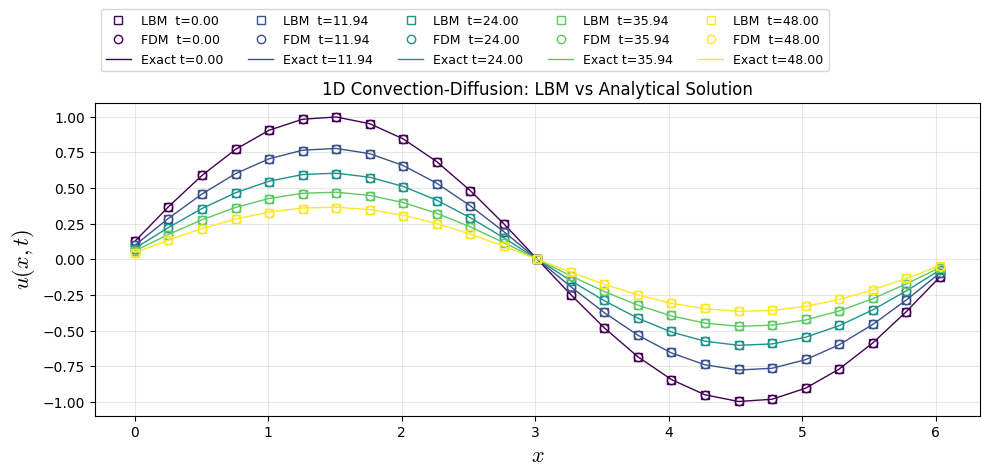

In [160]:
#****************************************Data-Analysis*********************************************
# ---------------- exact solution ----------------
def u_exact(x, t, A, k_w, phi, c, nu):
    return A * np.exp(-nu * k_w**2 * t) * np.sin(k_w * ((x+dx/2) - c*t) + phi)
u_ana = np.empty(snaps, dtype=object) # array field used to same data over time
for i in range(snaps):
    u_ana[i] = np.zeros((Nx), dtype="float64")
# -----------------Plot Results --------------------
plt.figure(figsize=(10,5))
colors = plt.cm.viridis(np.linspace(0, 1, snaps))
for i in range(snaps):
    plt.plot(x, u_snaps[i], "s", color=colors[i], lw=1, label=f"LBM  t={(snaps_id[i]/nt)*t_end:.2f}",fillstyle='none')
    plt.plot(x, uf_snaps[i], "o", color=colors[i], lw=1, label=f"FDM  t={(snaps_id[i]/nt)*t_end:.2f}",fillstyle='none')
    u_ana[i] = u_exact(x, (snaps_id[i]/nt)*t_end , A, k_w, phi, c, nu)
    plt.plot(x, u_ana[i], color=colors[i], lw=1, label=f"Exact t={(snaps_id[i]/nt)*t_end:.2f}")

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$u(x,t)$",fontsize=16)
plt.title("1D Convection-Diffusion: LBM vs Analytical Solution")
plt.grid(True, alpha=0.3)
plt.legend(ncol=5,fontsize=9,loc="center left",bbox_to_anchor=(0.0, 1.2))
plt.tight_layout()
plt.show()

## 2nd Benchmark: Temperature ramp

Analyzing the accuracy of diffusive equation solver, we apply it to a one-dimensional analytical case. The geometry is described by a domain of length $L$ initialized with a constant temperatura $T(x,t=0)=0$. The boundary conditions are given $T(x=0,t)=1$ and $T(x=L,t)=0$.

### Steady-State Analytical Solution

The analytical solution of this problem is given by:

$$
T(x,t\rightarrow \infty)= -\frac{x}{L} + 1.
$$

### Transient Analytical Solution

For the 1D heat equation $\partial_t T=\nu\,\partial_{xx}T$ on $0<x<L$ with

$$
T(0,t)=1,\qquad T(L,t)=0,
$$

the steady state is $T_{\text{ss}}(x)=1-\tfrac{x}{L}$. With $u=T-T_{\text{ss}}$ (so $u(0,t)=u(L,t)=0$), the solution is

$$
T(x,t)=1-\frac{x}{L}+\sum_{n=1}^{\infty} B_n\,e^{-\nu (n\pi/L)^2 t}\,\sin\!\Big(\frac{n\pi x}{L}\Big),
\quad
B_n=\frac{2}{L}\int_0^L\!\Big[T_0(\xi)-\Big(1-\frac{\xi}{L}\Big)\Big]\sin\!\Big(\frac{n\pi \xi}{L}\Big)\,d\xi.
$$

Special case $T_0(x)=0$: $B_n=-\dfrac{2}{n\pi}$, so

$$
T(x,t)=1-\frac{x}{L}-\frac{2}{\pi}\sum_{n=1}^{\infty}\frac{1}{n}\,e^{-\nu (n\pi/L)^2 t}\,\sin\!\Big(\frac{n\pi x}{L}\Big).
$$

Here’s a ready-to-run Python snippet (with a single plot of $T(x,t)$ vs $x$ for multiple times):

### LBM D1Q3 Code - FDM Code

In [30]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0             # Length of the domain
nu = 0.1/2.0        # Diffusion coefficient
t_end = 8.0             # Total simulation time
#--------------------------------------- Lattice-Properties-D1Q3 ----------------------------------------------
cs=1.0/np.sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int8")  
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=21               # Domain Length
dx = L / (Nx-1)     # Spatial step size
c=1.0*2**(2)        # c=dx/dt
dt=dx/c             # Time step value
nt = int(t_end / dt)    # Time step number
nue=nu/(c*dx)       # Diffusion coefficient
tau=nue/cs**2+0.5   # Relaxation Time
omg=1.0/tau
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"nue={nue:.4f}\t tau={tau:.4f}\t omega={omg:.4f}")
#--------------------------------- Initialization - LBM - Numerical Arrays -----------------------------------------
T = np.zeros((Nx),dtype="float64")
T[0]=1.0 # Initital Temperature Field
f = np.zeros((3,Nx),dtype="float64")
fp = np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*T[:]
    fp[k,:]=w[k]*T[:]
#--------------------------------- Initialization - FDM - Numerical Arrays -----------------------------------------
Tfm2 = np.zeros((Nx),dtype="float64")    # Temperature field at the step t-2
Tfm = np.zeros((Nx),dtype="float64")    # Temperature field at the step t-1
Tf = np.zeros((Nx),dtype="float64")     # Temperature field at the step t
Tfp = np.zeros((Nx),dtype="float64")    # Temperature field at the step t+1
Tfm2[0]=1.0                              # Initital Temperature Field
Tfm[0]=1.0                              # Initital Temperature Field
Tf[0]=1.0                               # Initital Temperature Field
Tfp[0]=1.0                              # Initital Temperature Field
#--------------------------------- Initialization - Save Data Arrays -----------------------------------------
snaps=5 # number of states saved over time including 0 and t_end
T_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
Tf_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
snaps_id = np.linspace(0, nt, snaps, dtype="int16") # timesteps to take the field
snap_index = {sid: i for i, sid in enumerate(snaps_id)}
for i in range(snaps):
    T_snaps[i] = np.zeros((Nx), dtype="float64")
    Tf_snaps[i] = np.zeros((Nx), dtype="float64")
T_snaps[0][:]=T[:]
Tf_snaps[0][:]=Tf[:]    
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #========================================= LBM - Solution =============================================
    #--------------------Collision----------------
    for k in range(0,3):
        fp[k,:]=f[k,:] - (f[k,:] - w[k]*T[:])/tau
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[2,Nx-1]= 0.0 - f[0,Nx-1]-f[1,Nx-1]
    #----------------------Macro------------------
    T[:]=f[0,:]+f[1,:]+f[2,:]
    #---------------------save-snaps--------------
    if t+1 in snaps_id:
        i = snap_index[t+1]
        T_snaps[i][:]=T[:]
    #========================================= FDM - Solution =============================================
    if (t<2) :
        Tfm2[:]=Tfm[:]     # Swap for update t-1 to t-2
        Tfm[:]=Tf[:]     # Swap for update t to t-1
        Tf[:]=T[:]     # Swap for update t to t-1
    else :
        Tfp[:]=( ( (1-omg+omg*w[1])*np.roll(Tf[:],1,axis=0) + (1-omg+omg*w[0])*Tf[:] + (1-omg+omg*w[2])*np.roll(Tf[:],-1,axis=0) )
                 - (1-omg)**(2)*( np.roll(Tfm[:], 1, axis=0) + Tfm[:] + np.roll(Tfm[:], -1, axis=0) )
                 - (1-omg)*omg*( (w[0]+w[1])*np.roll(Tfm[:], 1, axis=0) + (w[2]+w[1])*Tfm[:] + (w[2]+w[0])*np.roll(Tfm[:], -1, axis=0) )
                 + (1.0-omg)**(2)*Tfm2[:]  )
        Tfp[0]=1.0
        Tfp[Nx-1]=0.0
        Tfm2[:]=Tfm[:]     # Swap for update t-1 to t-2
        Tfm[:]=Tf[:]     # Swap for update t to t-1
        Tf[:]=Tfp[:]     # Swap for update t+1 to t
    #---------------------save-snaps------------
    if t+1 in snaps_id:
        i = snap_index[t+1]
        Tf_snaps[i][:]=Tfp[:]

dx=5.0000e-02	 dt=1.2500e-02	 nt=640
nue=0.2500	 tau=1.2500	 omega=0.8000


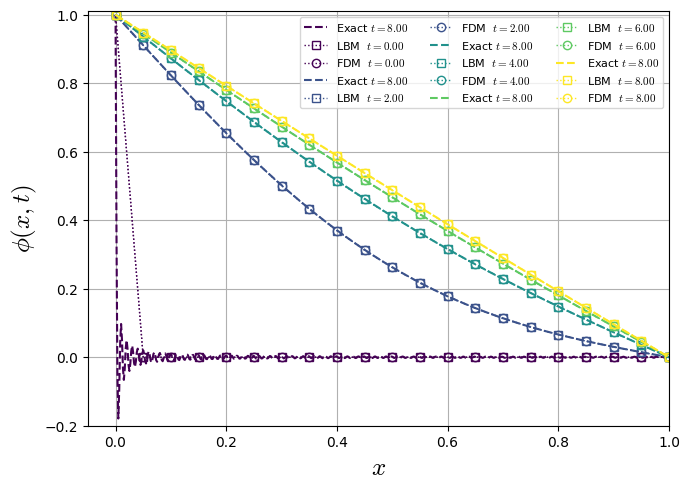

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Modes and series -------------------------------------------------------
def modes_dirichlet_dirichlet(L, N):
    n = np.arange(1, N+1)        # n = 1,2,...,N
    k = n * np.pi / L            # eigenvalues mu_n
    return n, k

def project_coeffs_dirichlet(T0_func, L, N, grid_pts=4000):
    """
    B_n = (2/L) ∫( T0(x) - T_ss(x) ) sin(nπx/L) dx, with T_ss = 1 - x/L.
    """
    x = np.linspace(0.0, L, grid_pts, endpoint=True)
    Tss = 1.0 - x / L
    u0 = T0_func(x) - Tss
    n, k = modes_dirichlet_dirichlet(L, N)          # (N,), (N,)
    S = np.sin(k[:, None] * x[None, :])             # (N, M)
    B = (2.0 / L) * np.trapz(u0[None, :] * S, x, axis=1)
    return B, n, k

def T_series_dirichlet(x, t, L, nu, B, k):
    """
    T(x,t) = T_ss(x) + sum_n B_n e^{-nu k_n^2 t} sin(k_n x), T_ss = 1 - x/L.
    """
    x = np.asarray(x)
    Tss = 1.0 - x / L
    coeff = B * np.exp(-nu * (k**2) * t)            # (N,)
    add = np.sum(coeff[:, None] * np.sin(k[:, None] * x[None, :]), axis=0)
    return Tss + add

# ---- Parameters -------------------------------------------------------------
L   = 1.0
nu  = 0.1/2.0 
N   = 200
x   = np.linspace(0, L, 600)

# ---- Case A: initially cold rod T0(x)=0 (closed-form coefficients) ----------
n, k = modes_dirichlet_dirichlet(L, N)
B_cold = -2.0 / (n * np.pi)   # exact coefficients for T0 ≡ 0

times = [0.0, 2.0, 4.0, 6.0, 8.0]

#--------------------------------------- Plot Results -------------------------------------------------------
xl = np.linspace(0, L, Nx)
times = np.linspace(0, t_end, snaps, dtype="float64") # timesteps to take the field
plt.figure(figsize=(7, 5))
colors = plt.cm.viridis(np.linspace(0, 1, snaps))
for i in range(snaps):
    T_xt = T_series_dirichlet(x, times[i], L, nu, B_cold, k)
    plt.plot(x, T_xt, "--", color=colors[i], label=f"Exact $t = {t:.2f}$")
    plt.plot(xl, T_snaps[i], "s:", color=colors[i], lw=1, label=f"LBM  $t={(snaps_id[i]/nt)*t_end :.2f}$",fillstyle='none')
    plt.plot(xl, Tf_snaps[i], "o:", color=colors[i], lw=1, label=f"FDM  $t={(snaps_id[i]/nt)*t_end :.2f}$",fillstyle='none')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$\phi(x,t)$",fontsize=18)
plt.legend(ncol=3,fontsize=8)
plt.xlim(-0.05,1)
plt.ylim(-0.2,1.01)
plt.grid(True)
plt.tight_layout()
plt.show()

## Fourth-order Diffusive Equation

Expanding the sums:

$$
\begin{array}{c}
\phi_{x}^{t+1} = (1-\omega + \omega w_{0}) \phi_{x}^{t} + (1-\omega + \omega w_{1}) \phi_{x-1}^{t} + (1-\omega + \omega w_{2}) \phi_{x+1}^{t} - (1-\omega)^{2} \Big( \phi_{x}^{t-1} + \phi_{x-1}^{t-1} + \phi_{x+1}^{t-1}  \Big) \\
-(1-\omega)\omega \Big( (w_{1}+w_{2})\phi_{x}^{t-1} + (w_{0}+w_{1})\phi_{x-1}^{t-1} + (w_{0}+w_{2})\phi_{x+1}^{t-1}  \Big) + (1-\omega)^{2} \phi_{x}^{t-2}
\end{array}
$$

Considering 
$$
\alpha_{1}=\Omega + a\omega, \quad \alpha_{2}=\Omega + (1-2a)\omega, \quad \beta_{1}=-\Omega(\Omega + (1-a)\omega), \quad \textrm{and} \quad \beta_{2}=-\Omega(\Omega + 2a\omega),
$$

where $\Omega=(1-\omega)$ and $a=w_{1}=w_{2}$. Replacing in the Eq. {eq}`df-final-form-fdm`:

$$
\begin{array}{c}
\phi_{x}^{t+1} = \alpha_{1} \phi_{x-1}^{t} + \alpha_{2} \phi_{x}^{t} + \alpha_{1} \phi_{x+1}^{t} + \beta_{1}\phi_{x-1}^{t-1} + \beta_{2}\phi_{x}^{t-1} + \beta_{1}\phi_{x+1}^{t-1}  + (1-\omega)^{2} \phi_{x}^{t-2}
\end{array}
$$

To recover the partial differetial equation described by the above equation, we expand each $\phi$ term in Taylor series:

$$
\phi_{x}^{t\pm 1} = \phi \pm \Delta_{t}\frac{\partial\phi}{\partial t} + \frac{\Delta_{t}^{2}}{2}\frac{\partial^{2}\phi}{\partial t^{2}} \pm \frac{\Delta_{t}^{3}}{6}\frac{\partial^{3}\phi}{\partial t^{3}} + \frac{\Delta_{t}^{4}}{24}\frac{\partial^{4}\phi}{\partial t^{4}} \pm  \mathcal{O}(\Delta t)^{4},
$$

$$
\phi_{x\pm 1}^{t} = \phi \pm \Delta_{x}\frac{\partial\phi}{\partial x} + \frac{\Delta_{x}^{2}}{2}\frac{\partial^{2}\phi}{\partial x^{2}} \pm \frac{\Delta_{x}^{3}}{6}\frac{\partial^{3}\phi}{\partial x^{3}} + \frac{\Delta_{x}^{4}}{24}\frac{\partial^{4}\phi}{\partial x^{4}} \pm \mathcal{O}(\Delta x)^{4},
$$

$$
\phi_{x}^{t - 2} = \phi - 2\Delta_{t}\frac{\partial\phi}{\partial t} + \frac{4\Delta_{t}^{2}}{2}\frac{\partial^{2}\phi}{\partial t^{2}} - \frac{8\Delta_{t}^{3}}{6}\frac{\partial^{3}\phi}{\partial t^{3}} + \frac{16\Delta_{t}^{4}}{24}\frac{\partial^{4}\phi}{\partial t^{4}} \pm  \mathcal{O}(\Delta t)^{4},
$$

$$
\phi_{x\pm 1}^{t-1} = \phi \pm \Delta_{x}\frac{\partial\phi}{\partial x} - \Delta_{t}\frac{\partial\phi}{\partial t} + \frac{\Delta_{x}^{2}}{2}\frac{\partial^{2}\phi}{\partial x^{2}} \mp \Delta_{t}\Delta_{x} \frac{\partial^{2}\phi}{\partial x\partial t} + \frac{\Delta_{t}^{2}}{2}\frac{\partial^{2}\phi}{\partial t^{2}} \pm \frac{\Delta_{x}^{3}}{6}\frac{\partial^{3}\phi}{\partial x^{3}} \mp \frac{\Delta_{x}^{2}\Delta_{t}}{2}\frac{\partial^{3}\phi}{\partial x^{2}\partial t}  \pm \frac{\Delta_{x}\Delta_{t}^{2}}{2}\frac{\partial^{3}\phi}{\partial x\partial t^{2}} - \frac{\Delta_{t}^{3}}{6}\frac{\partial^{3}\phi}{\partial t^{3}} + \mathcal{O}(\Delta x \Delta t)^{3}.
$$

Replacing the expanded terms and simplifying the term (this link provide a sympy code that reach the above equation {doc}`appendix/sympy-code-fdm-diffusive-expansion`), we have:

$$
0=\Delta_{t} \omega^{2} \frac{\partial\phi}{\partial t} + \Delta_{x}^{2} a \omega \left(\omega - 2\right) \frac{\partial^{2}\phi}{\partial x^{2}}  + \frac{\Delta_{t}^{2} \omega \left(4 - 3 \omega\right) }{2} \frac{\partial^{2}\phi}{\partial t^{2}} - \Delta_{t} \Delta_{x}^{2} \left(a \omega^{2} - a \omega - \omega + 1\right) \frac{\partial^{3}\phi}{\partial x^{2}\partial t} + \frac{\Delta_{x}^{4} a \omega \left(\omega - 2\right) }{12}\frac{\partial^{4}\phi}{\partial x^{4}}
$$

$$
\Delta_{t} \omega^{2} \frac{\partial\phi}{\partial t} = - \Delta_{x}^{2} a \omega \left(\omega - 2\right) \frac{\partial^{2}\phi}{\partial x^{2}}  - \frac{\Delta_{t}^{2} \omega \left(4 - 3 \omega\right) }{2} \frac{\partial^{2}\phi}{\partial t^{2}} + \Delta_{t} \Delta_{x}^{2} \left(a \omega^{2} - a \omega - \omega + 1\right) \frac{\partial^{3}\phi}{\partial x^{2}\partial t} - \frac{\Delta_{x}^{4} a \omega \left(\omega - 2\right) }{12}\frac{\partial^{4}\phi}{\partial x^{4}}
$$

$$
\frac{\partial\phi}{\partial t} = \frac{a \left(2 - \omega \right)}{\omega} \frac{\Delta_{x}^{2}}{\Delta_{t}} \frac{\partial^{2}\phi}{\partial x^{2}}  + \frac{ \left(3 \omega - 4\right) \Delta_{t}}{2\omega} \frac{\partial^{2}\phi}{\partial t^{2}} + \frac{\left(a \omega^{2} - a \omega - \omega + 1\right)\Delta_{x}^{2}}{\omega^{2}} \frac{\partial^{3}\phi}{\partial x^{2}\partial t} + \frac{ a \left(2 - \omega\right) }{12\omega} \frac{\Delta_{x}^{4}}{\Delta_{t}} \frac{\partial^{4}\phi}{\partial x^{4}}
$$

where $\nu=\frac{a \left(2 - \omega \right)}{\omega} \frac{\Delta_{x}^{2}}{\Delta_{t}}$ is the same term recovered in the Chapman-Enskog Analysis. To enforce fourth-order $\Delta_{x}$ convergence rate, employ the relations

$$
\frac{\partial\phi}{\partial t} = \nu \frac{\partial^{2}\phi}{\partial x^{2}}, \qquad \frac{\partial^{2}\phi}{\partial t^{2}} = \nu^{2} \frac{\partial^{4}\phi}{\partial x^{4}}, \qquad \frac{\partial^{3}\phi}{\partial x^{2}\partial t} = \nu \frac{\partial^{4}\phi}{\partial x^{4}}
$$

$$
\frac{\partial\phi}{\partial t} = \nu\frac{\partial^{2}\phi}{\partial x^{2}}  + \frac{a \left(2 - \omega \right)}{\omega} \frac{ \left(3 \omega - 4\right) \nu\Delta_{x}^{2}}{2\omega} \frac{\partial^{4}\phi}{\partial x^{4}} + \frac{\left(a \omega^{2} - a \omega - \omega + 1\right)\nu\Delta_{x}^{2}}{\omega^{2}} \frac{\partial^{4}\phi}{\partial x^{4}} + \frac{\nu\Delta_{x}^{2}}{12} \frac{\partial^{4}\phi}{\partial x^{4}}
$$

$$
\frac{\partial\phi}{\partial t} = \nu\frac{\partial^{2}\phi}{\partial x^{2}}  + \frac{ a\left(6 \omega - 8 - 3\omega^{2} + 4 \omega \right) \nu\Delta_{x}^{2}}{2\omega^{2}} \frac{\partial^{4}\phi}{\partial x^{4}} + \frac{\left(a \omega^{2} - a \omega - \omega + 1\right)\nu\Delta_{x}^{2}}{\omega^{2}} \frac{\partial^{4}\phi}{\partial x^{4}} + \frac{\omega^{2}\nu\Delta_{x}^{2}}{12\omega^{2}} \frac{\partial^{4}\phi}{\partial x^{4}}
$$

$$
\frac{\partial\phi}{\partial t} = \nu\frac{\partial^{2}\phi}{\partial x^{2}}  + \frac{\nu\Delta_{x}^{2}}{2\omega^{2}}\left( a\left(10 \omega - 8 - 3\omega^{2} \right)  + 2\left(a \omega^{2} - a \omega - \omega + 1\right) + \frac{\omega^{2}}{6} \right) \frac{\partial^{4}\phi}{\partial x^{4}} 
$$

$$
\frac{\partial\phi}{\partial t} = \nu\frac{\partial^{2}\phi}{\partial x^{2}}  + \frac{\nu\Delta_{x}^{2}}{2\omega^{2}}\left( a\left(8 \omega - 8 - \omega^{2} \right)  + 2\left(1 - \omega \right) + \frac{\omega^{2}}{6} \right) \frac{\partial^{4}\phi}{\partial x^{4}} 
$$

$$
\frac{\partial\phi}{\partial t} = \nu\frac{\partial^{2}\phi}{\partial x^{2}}  - \frac{\nu\Delta_{x}^{2}}{2\omega^{2}}\left( a\left(\omega^{2} - 8 \omega + 8 \right)  - \frac{\omega^{2} - 12\omega + 12 }{6} \right) \frac{\partial^{4}\phi}{\partial x^{4}} + \mathcal{O}(\Delta x)^{4}
$$

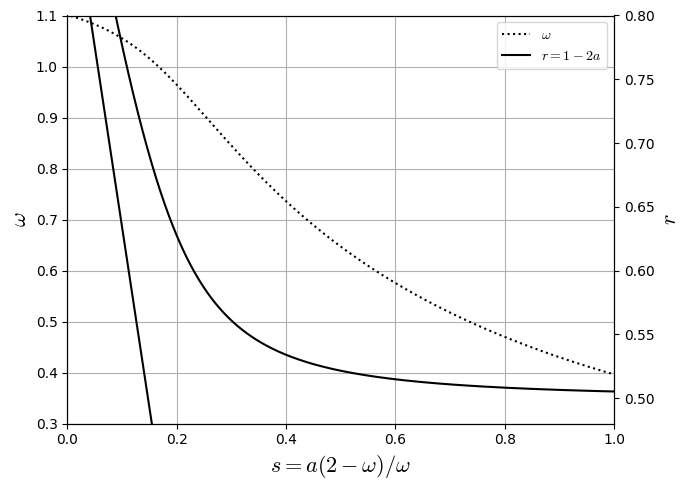

In [92]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'

# ---- data ----
om = np.linspace(0.2, 1.5, 1000)
a  = (om**2 - 12*om + 12) / (6*(om**2 - 8*om + 8))
r  = 1.0 - 2.0*a
s  = a * (2.0 - om) / om

# ---- figure and axes ----
fig, ax1 = plt.subplots(figsize=(7, 5))

# Left y-axis: omega
ax1.plot(s, om, 'k:', label=r'$\omega$')
ax1.set_xlabel(r'$s = a(2-\omega)/\omega$',fontsize=16)
ax1.set_ylabel(r'$\omega$',fontsize=16)
ax1.set_ylim(0.3, 1.1)
ax1.set_xlim(0.0, 1.0)
ax1.grid(True)

# Right y-axis: r
ax2 = ax1.twinx()
ax2.plot(s, r, 'k-', label=r'$r = 1 - 2a$')
ax2.set_ylabel(r'$r$',fontsize=16)
ax2.set_ylim(0.48, 0.8)
ax2.set_xlim(0.0, 1.0)

# ---- combined legend ----
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.tight_layout()
plt.show()

In [106]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
A   = 1.0                         # Amplitude
phi = 0.0                         # Wave initial shift
k_w   = 1.0                       # Wave number
c   = 0.0                         # wave speed
nu  = 0.066666666666666666*np.pi # Diffusive coefficient
m_waves = 1                       # Wave Period
L = m_waves * (2.0*np.pi / k_w)   # Domain Lentgh
t_end = 12.0                       # Final time
#--------------------------------------- Lattice-Properties-D1Q3 ----------------------------------------------
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
cs=1.0/np.sqrt(3.0);
#--------------------------------- Initialization - Save Data Arrays -----------------------------------------------
cases=4
Nx0 = np.array([10, 20, 40, 80],dtype="int64")
r0 = 2**(0)*np.array([2.0**(1), 2.0**(2), 2.0**(3), 2.0**(4)],dtype="float64")
u_cases = np.empty(cases, dtype=object) # array field used to same data over time
for i in range(cases):
    u_cases[i] = np.zeros((Nx0[i]), dtype="float64")
for case in range(0,cases):
    #------------------------------------- Parameters (numerical units) -------------------------------------------
    Nx=Nx0[case]  # Numerical Length
    x  = np.linspace(0.0, L, Nx, endpoint=False,dtype="float64") # Numerical Domain
    dx = L / Nx # Grid size
    r = 1*r0[case] # dx/dt relation
    dt = dx/r
    ce = c/r
    nue = nu * dt / (dx*dx)
    tau = 0.5 + nue / cs**2
    omg=1.0/tau
    nt = int(np.ceil(t_end / dt))
    print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}\t tn={nt*dt:.2f}") # Print values for check
    print(f"c_lbm={ce:.3f}, tau={tau:.4f}\t omega={omg:.2f}")
    print(f"nt={nt:.3f}, nue={nue:.4f}")
    #--------------------------------- Initialization - LBM - Numerical Arrays -----------------------------------------
    u=np.zeros((Nx),dtype="float64")
    u = A * np.sin(k_w*(x+dx/2) + phi)
    f=np.zeros((3,Nx),dtype="float64")
    fp=np.zeros((3,Nx),dtype="float64")
    for k in range(0,3):
        f[k,:]=w[k]*(u[:]+cx[k]*ce*u[:]/cs**2)
        fp[k,:]=w[k]*(u[:]+cx[k]*ce*u[:]/cs**2)
    #----------------------------------------- Maind Loop --------------------------------------------------------
    for t in range(nt):
        #========================================= LBM - Solution =============================================
        #--------------------Collision----------------
        for k in range(0,3):
            fp[k,:]= f[k,:] - (f[k,:] - w[k]*(u[:]+cx[k]*(ce*u[:])/cs**2))/tau
        #-----------------streaming-------------------
        for k in range(0,3):
            f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
        #----------------------Macro------------------
        u[:]=f[0,:]+f[1,:]+f[2,:]
    #---------------------save-field-cases--------------
    u_cases[case][:]=u[:]

dx=6.2832e-01	 dt=3.1416e-01	 nt=39	 tn=12.25
c_lbm=0.000, tau=1.0000	 omega=1.00
nt=39.000, nue=0.1667
dx=3.1416e-01	 dt=7.8540e-02	 nt=153	 tn=12.02
c_lbm=0.000, tau=1.0000	 omega=1.00
nt=153.000, nue=0.1667
dx=1.5708e-01	 dt=1.9635e-02	 nt=612	 tn=12.02
c_lbm=0.000, tau=1.0000	 omega=1.00
nt=612.000, nue=0.1667
dx=7.8540e-02	 dt=4.9087e-03	 nt=2445	 tn=12.00
c_lbm=0.000, tau=1.0000	 omega=1.00
nt=2445.000, nue=0.1667


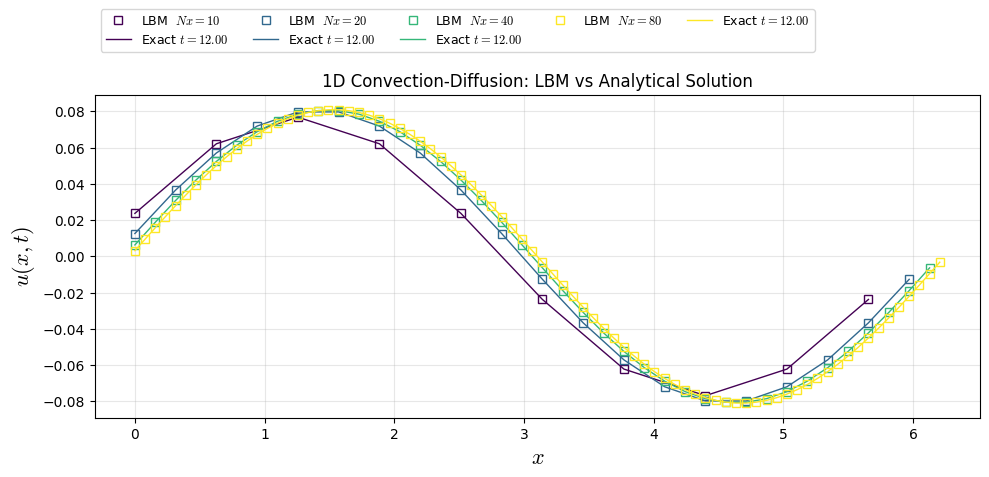

In [156]:
#****************************************Data-Analysis*********************************************
# ---------------- exact solution ----------------
def u_exact(x, t, A, k_w, phi, c, nu):
    return A * np.exp(-nu * k_w**2 * t) * np.sin(k_w * ((x+dx/2) - c*t) + phi)
u_ana = np.empty(cases, dtype=object) # array field used to same data over time
xl = np.empty(cases, dtype=object) # array field used to same data over time
for i in range(cases):
    Nx=Nx0[i]  # Numerical Length
    x  = np.linspace(0.0, L, Nx, endpoint=False,dtype="float64") # Numerical Domain
    dx = L / Nx # Grid size
    r = r0[i] # dx/dt relation
    dt = dx/r
    nt = int(np.ceil(t_end / dt))
    xl[i] = np.linspace(0.0, L, Nx0[i], endpoint=False,dtype="float64")
    u_ana[i] = np.zeros((Nx0[i]), dtype="float64")
    u_ana[i] = u_exact(xl[i], nt*dt , A, k_w, phi, c, nu)
# -----------------Plot Results --------------------
plt.figure(figsize=(10,5))
colors = plt.cm.viridis(np.linspace(0, 1, cases))
for i in range(cases):
    plt.plot(xl[i], u_cases[i], "s", color=colors[i], lw=1, label=f"LBM  $Nx={Nx0[i]:.0f}$",fillstyle='none')
    plt.plot(xl[i], u_ana[i], color=colors[i], lw=1, label=f"Exact $t={t_end:.2f}$")

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$u(x,t)$",fontsize=16)
plt.title("1D Convection-Diffusion: LBM vs Analytical Solution")
plt.grid(True, alpha=0.3)
plt.legend(ncol=5,fontsize=9,loc="center left",bbox_to_anchor=(0.0, 1.2))
plt.tight_layout()
plt.show()

In [108]:
Erro= np.zeros((cases), dtype="float64")
for i in range(cases):
    Erro[i]=np.sqrt(np.sum((u_cases[i]-u_ana[i])**2))/np.sqrt(np.sum((u_ana[i])**2))
    print(f'Erro{i}=',Erro[i])
TEp=np.polyfit(np.log(Nx0), np.log(Erro), 1)
print(TEp)
print(f'ltests[i] = np.array([{1/tau:.2f},{cs**2:.2f},{-TEp[0]:.2f},{Erro[0]},{Erro[1]},{Erro[2]},{Erro[3]}],dtype="float64")')

Erro0= 0.0007675056151646606
Erro1= 4.5801886601000255e-05
Erro2= 2.843695561303167e-06
Erro3= 1.772197264107726e-07
[-4.02508353  2.08310237]
ltests[i] = np.array([1.00,0.33,4.03,0.0007675056151646606,4.5801886601000255e-05,2.843695561303167e-06,1.772197264107726e-07],dtype="float64")


In [104]:
#------------------ List of teste cases ---------------------------
ntests=7
ltests = np.empty(ntests, dtype=object) # list [omega, cs**2, a, erro1, erro2, erro3]
ltests[0] = np.array([1.00,0.33,4.03,0.0007675056151646606,4.5801886601000255e-05,2.843695561303167e-06,1.772197264107726e-07],dtype="float64")
ltests[1] = np.array([1.33,0.33,1.98,0.14172076082874474,0.03676563394470728,0.00926664086838909,0.0023217597555758216],dtype="float64")
ltests[2] = np.array([1.60,0.33,1.97,0.173048134806591,0.045658664282350235,0.011566406970317222,0.002901017675903232],dtype="float64")
ltests[3] = np.array([1.78,0.33,1.96,0.1806210735638166,0.04785433656697225,0.012139180249442527,0.003045785275804],dtype="float64")
ltests[4] = np.array([0.67,0.33,2.12,0.4515322151274699,0.09291589762687379,0.022049149483031594,0.005442330222168221],dtype="float64")
ltests[5] = np.array([0.40,0.33,2.19,2.5815332944176905,0.5537880973820454,0.11602188228229841,0.02759320543861061],dtype="float64")
ltests[6] = np.array([0.22,0.33,1.80,4.667938739917,2.687002267460583,0.5746533215752334,0.1219574567471747],dtype="float64")

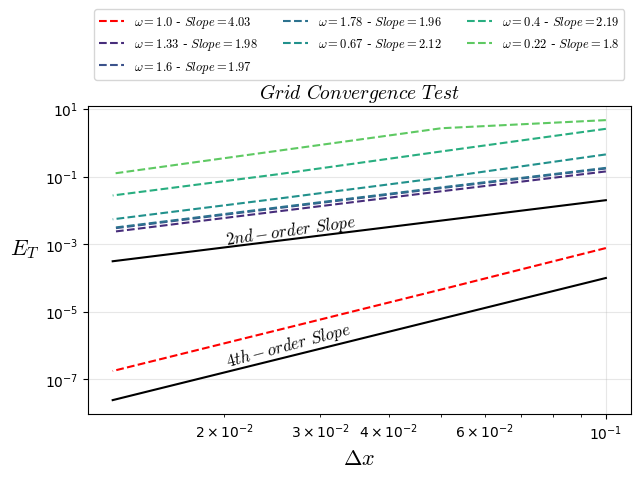

In [154]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.figure(figsize=(7,4))
plt.title("$Grid$ $Convergence$ $Test$",fontsize=14)
colors = plt.cm.viridis(np.linspace(0, 1, ntests-1))
plt.loglog(1/Nx0,ltests[0][3:],'r--',fillstyle='none', label=f'$\\omega={ltests[0][0]}$ - $Slope={ltests[0][2]}$')
for i in range(7)[1:]:
    plt.loglog(1/Nx0,ltests[i][3:],'--',color=colors[i],fillstyle='none', label=f'$\\omega={ltests[i][0]}$ - $Slope={ltests[i][2]}$')
    
plt.loglog(1/Nx0,2.*1.0/(Nx0**2),'k-',fillstyle='none')
plt.text(0.02, 0.001, "$2nd-order$ $Slope$", rotation=8,fontsize=12)
plt.loglog(1/Nx0,1.*1.0/(Nx0**4),'k-',fillstyle='none')
plt.text(0.02, 0.00000025, "$4th-order$ $Slope$", rotation=15,fontsize=12)
# plt.ylim(0,0.01)
plt.grid(True, alpha=0.3)
# plt.legend(loc=2,ncol=3,fontsize=8.5)
plt.legend(ncol=3,fontsize=9,loc="center left",bbox_to_anchor=(0.0, 1.2))
plt.ylabel('$E_{T}$',fontsize=16,rotation=0,horizontalalignment='right')
plt.xlabel('$\Delta x$',fontsize=16)
plt.show()

In [163]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
A   = 1.0                         # Amplitude
phi = 0.0                         # Wave initial shift
k_w   = 1.0                       # Wave number
c   = 1.0                         # wave speed
nu  = 0.0066666666666666666*np.pi # Diffusive coefficient
m_waves = 1                       # Wave Period
L = m_waves * (2.0*np.pi / k_w)   # Domain Lentgh
t_end = 48.0                       # Final time
#--------------------------------------- Lattice-Properties-D1Q3 ----------------------------------------------
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
cs=1.0/np.sqrt(3.0);
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx = 50 # Numerical Length
x  = np.linspace(0.0, L, Nx, endpoint=False,dtype="float64") # Numerical Domain
dx = L / Nx # Grid size
r=2**(3) # dx/dt relation
dt = dx/r
ce = c/r
nue = nu * dt / (dx*dx)
tau = 0.5 + nue / cs**2
omg=1.0/tau
nt = int(np.ceil(t_end / dt))
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"c_lbm={ce:.3f}, tau={tau:.4f}\t omega={omg:.4f}")
print(f"nt={nt:.3f}, nue={nue:.4f}")
#--------------------------------- Initialization - LBM - Numerical Arrays -----------------------------------------
u=np.zeros((Nx),dtype="float64")
u = A * np.sin(k_w*(x+dx/2) + phi)
f=np.zeros((3,Nx),dtype="float64")
fp=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(u[:]+cx[k]*ce*u[:]/cs**2)
    fp[k,:]=w[k]*(u[:]+cx[k]*ce*u[:]/cs**2)
#--------------------------------- Initialization - FDM - Numerical Arrays -----------------------------------------
ufm2=np.zeros((Nx),dtype="float64")    # u field at the step t-2
ufm=np.zeros((Nx),dtype="float64")    # u field at the step t-1
uf=np.zeros((Nx),dtype="float64")     # u field at the step t
ufp=np.zeros((Nx),dtype="float64")    # u field at the step t+1
ufm2 = A * np.sin(k_w*(x+dx/2) + phi)
ufm = A * np.sin(k_w*(x+dx/2) + phi)
uf = A * np.sin(k_w*(x+dx/2) + phi)
ufp = A * np.sin(k_w*(x+dx/2) + phi)
#--------------------------------- Initialization - Save Data Arrays -----------------------------------------------
snaps=5 # number of states saved over time including 0 and t_end
u_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
uf_snaps = np.empty(snaps, dtype=object) # array field used to same data over time
snaps_id = np.linspace(0, nt, snaps, dtype="int16") # timesteps to take the field
snap_index = {sid: i for i, sid in enumerate(snaps_id)}
for i in range(snaps):
    u_snaps[i] = np.zeros((Nx), dtype="float64")
    uf_snaps[i] = np.zeros((Nx), dtype="float64")
u_snaps[0][:]=u[:]
uf_snaps[0][:]=uf[:]
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #========================================= LBM - Solution =============================================
    #--------------------Collision----------------
    for k in range(0,3):
        fp[k,:]= f[k,:] - (f[k,:] - w[k]*(u[:]+cx[k]*(ce*u[:])/cs**2))/tau
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
    #----------------------Macro------------------
    u[:]=f[0,:]+f[1,:]+f[2,:]
    #---------------------save-snaps--------------
    if t+1 in snaps_id:
        i = snap_index[t+1]
        u_snaps[i][:]=u[:]
    #========================================= FDM - Solution =============================================
    if (t<2) :
        ufm2[:]=ufm[:]     # Swap for update t-1 to t-2
        ufm[:]=uf[:]       # Swap for update t to t-1
        uf[:]=u[:]         # Swap for update t to t-1
    else :
        ufp[:]=( ( (1-omg+omg*w[1])*np.roll(uf[:],1,axis=0) + (1-omg+omg*w[0])*uf[:] + (1-omg+omg*w[2])*np.roll(uf[:],-1,axis=0) )
                 - (1-omg)**(2)*( np.roll(ufm[:], 1, axis=0) + ufm[:] + np.roll(ufm[:], -1, axis=0) )
                 - (1-omg)*omg*( (w[0]+w[1])*np.roll(ufm[:], 1, axis=0) + (w[2]+w[1])*ufm[:] + (w[2]+w[0])*np.roll(ufm[:], -1, axis=0) )
                 + (1.0-omg)**(2)*ufm2[:]  )
        ufm2[:]=ufm[:]     # Swap for update t-1 to t-2
        ufm[:]=uf[:]       # Swap for update t to t-1
        uf[:]=ufp[:]       # Swap for update t+1 to t
    if t+1 in snaps_id:
        i = snap_index[t+1]
        uf_snaps[i][:]=ufp[:]

dx=1.2566e-01	 dt=1.5708e-02	 nt=3056
c_lbm=0.125, tau=0.5625	 omega=1.7778
nt=3056.000, nue=0.0208


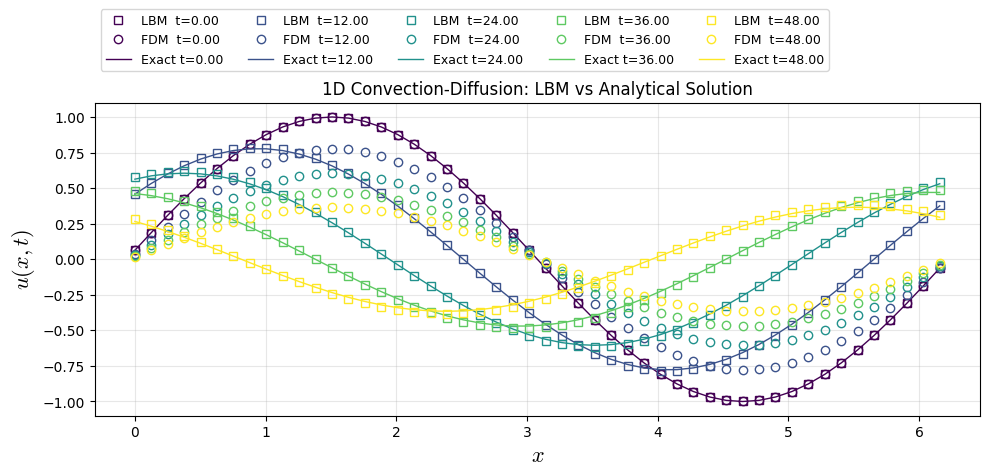

In [164]:
#****************************************Data-Analysis*********************************************
# ---------------- exact solution ----------------
def u_exact(x, t, A, k_w, phi, c, nu):
    return A * np.exp(-nu * k_w**2 * t) * np.sin(k_w * ((x+dx/2) - c*t) + phi)
u_ana = np.empty(snaps, dtype=object) # array field used to same data over time
for i in range(snaps):
    u_ana[i] = np.zeros((Nx), dtype="float64")
# -----------------Plot Results --------------------
plt.figure(figsize=(10,5))
colors = plt.cm.viridis(np.linspace(0, 1, snaps))
for i in range(snaps):
    plt.plot(x, u_snaps[i], "s", color=colors[i], lw=1, label=f"LBM  t={(snaps_id[i]/nt)*t_end:.2f}",fillstyle='none')
    plt.plot(x, uf_snaps[i], "o", color=colors[i], lw=1, label=f"FDM  t={(snaps_id[i]/nt)*t_end:.2f}",fillstyle='none')
    u_ana[i] = u_exact(x, (snaps_id[i]/nt)*t_end , A, k_w, phi, c, nu)
    plt.plot(x, u_ana[i], color=colors[i], lw=1, label=f"Exact t={(snaps_id[i]/nt)*t_end:.2f}")

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$u(x,t)$",fontsize=16)
plt.title("1D Convection-Diffusion: LBM vs Analytical Solution")
plt.grid(True, alpha=0.3)
plt.legend(ncol=5,fontsize=9,loc="center left",bbox_to_anchor=(0.0, 1.2))
plt.tight_layout()
plt.show()